In [1]:
!ls *csv

종로.csv    구로구.csv	성북구.csv  중랑구.csv		   동대문구.csv
중구.csv    금천구.csv	송파구.csv  홍릉로.csv		   서대문구.csv
강남구.csv  노원구.csv	신촌로.csv  화랑로.csv		   영등포구.csv
강동구.csv  도봉구.csv	양천구.csv  동작대로 중앙차로.csv  영등포로.csv
강북구.csv  동작구.csv	용산구.csv  강남대로.csv	   천호대로.csv
강서구.csv  마포구.csv	은평구.csv  강변북로.csv	   청계천로.csv
관악구.csv  서초구.csv	정릉로.csv  공항대로.csv	   한강대로.csv
광진구.csv  성동구.csv	종로구.csv  도산대로.csv


In [2]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd

df=read_csv('강남구.csv', header=0, dtype=({'date':str}))
df.drop(['location'], axis=1, inplace=True)


col_list=df.columns
for each in col_list:
    df[each].fillna(0, inplace=True)
    
df['datetime']=pd.to_datetime(df['date'])
df.drop(['date', 'time'], axis=1, inplace=True)
df.set_index('datetime', inplace=True)

df['windx']=df['wind_speed']*np.cos(df['wind_direction'])
df['windy']=-df['wind_speed']*np.sin(df['wind_direction'])
df.drop(['wind_direction', 'wind_speed'], axis=1, inplace=True)

#some extrme maybe dust which condider not the real concentration
#change to average of the column
df.loc[df['pm10']>400, ['pm10']]=df.pm10.mean()
df.loc[df['pm25']>180, ['pm10']]=df.pm25.mean()
df.loc[df['temperature']>45, ['temperature']]=df.temperature.mean()
df.loc[df['temperature']<-25, ['temperature']]=df.temperature.mean()
df.loc[df['rain']<0, ['rain']]=df.rain.mean()

In [3]:
print(type(df))
print(df.shape)
print(df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
(34896, 9)
Index(['pm10', 'pm25', 'temperature', 'sky_condition', 'rain', 'humidity',
       'rain_condition', 'windx', 'windy'],
      dtype='object')


,pm10,pm25,temperature,sky_condition,rain,humidity,rain_condition,windx,windy
datetime,,,,,,,,,
2015-01-02,23.0,16.0,-6.9,2,0.0,59,0,-1.699401,0.045137
2015-01-02,24.0,14.0,-5.1,3,0.0,44,0,1.082820,0.193651
2015-01-02,26.0,12.0,-4.9,2,0.0,41,0,0.064984,-2.098994
2015-01-02,18.0,11.0,-3.6,2,0.0,41,0,-2.880822,0.332963
2015-01-02,22.0,11.0,-3.0,1,0.0,34,0,3.898628,0.103432


In [4]:
df.dtypes

pm10              float64
pm25              float64
temperature       float64
sky_condition       int64
rain              float64
humidity            int64
rain_condition      int64
windx             float64
windy             float64
dtype: object

In [5]:
from pytz import all_timezones
import pytz

utc_seoul=pytz.timezone('Asia/Seoul')
df.index=df.index.tz_localize(tz='Asia/Seoul')

In [5]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='datetime', length=34896, freq=None)

In [6]:
df['2015-01-02 00': '2015-01-02']

,pm10,pm25,temperature,sky_condition,rain,humidity,rain_condition,windx,windy
datetime,,,,,,,,,
2015-01-02,23.0,16.0,-6.9,2,0.0,59,0,-1.699401,0.045137
2015-01-02,24.0,14.0,-5.1,3,0.0,44,0,1.082820,0.193651
2015-01-02,26.0,12.0,-4.9,2,0.0,41,0,0.064984,-2.098994
2015-01-02,18.0,11.0,-3.6,2,0.0,41,0,-2.880822,0.332963
2015-01-02,22.0,11.0,-3.0,1,0.0,34,0,3.898628,0.103432
2015-01-02,27.0,11.0,-2.4,1,0.0,33,0,-3.746426,-0.635839
2015-01-02,29.0,18.0,-1.9,1,0.0,29,0,-1.410786,-3.312051
2015-01-02,22.0,15.0,-1.7,1,0.0,28,0,-2.483467,0.287037
2015-01-02,31.0,10.0,-2.6,1,0.0,31,0,-3.450656,-0.585641


In [8]:
#df['Various', 'Day'] = df.index.dayofyear
#df['Various', 'Hour'] = df.index.hour
#df.pm10.resample('M')
#df.date=df.datetime.astype(str).str.slice(0,8)
#df.time=df.datetime.astype(str).str.slice(8,10)
#df.date=pd.to_datetime(df.date.astype(str),format='%y%m%d') 

#df.datetime=pd.to_datetime(df.datetime.astype(str),format='%Y%m%d%H')
#df.datetime=df.date
#df.datetime=pd.to_datetime(df.datetime, unit)

In [7]:
df.axes

[DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
                '2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
                '2015-01-02', '2015-01-02',
                ...
                '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
                '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
                '2018-12-31', '2018-12-31'],
               dtype='datetime64[ns]', name='datetime', length=34896, freq=None),
 Index(['pm10', 'pm25', 'temperature', 'sky_condition', 'rain', 'humidity',
        'rain_condition', 'windx', 'windy'],
       dtype='object')]

In [40]:
df.pm10

datetime
2015-01-02    23.0
2015-01-02    24.0
2015-01-02    26.0
2015-01-02    18.0
2015-01-02    22.0
2015-01-02    27.0
2015-01-02    29.0
2015-01-02    22.0
2015-01-02    31.0
2015-01-02    30.0
2015-01-02    24.0
2015-01-02    26.0
2015-01-02    29.0
2015-01-02    30.0
2015-01-02    28.0
2015-01-02    34.0
2015-01-02    36.0
2015-01-02    33.0
2015-01-02    38.0
2015-01-02    37.0
2015-01-02    40.0
2015-01-02    39.0
2015-01-02    33.0
2015-01-02    38.0
2015-01-03    37.0
2015-01-03    32.0
2015-01-03    33.0
2015-01-03    35.0
2015-01-03    39.0
2015-01-03    42.0
              ... 
2018-12-30    43.0
2018-12-30    46.0
2018-12-30    47.0
2018-12-30    50.0
2018-12-30    48.0
2018-12-30    48.0
2018-12-31    47.0
2018-12-31    51.0
2018-12-31    46.0
2018-12-31    44.0
2018-12-31    42.0
2018-12-31    44.0
2018-12-31    45.0
2018-12-31    51.0
2018-12-31    57.0
2018-12-31    64.0
2018-12-31    63.0
2018-12-31    55.0
2018-12-31    65.0
2018-12-31    48.0
2018-12-31    50.0
201

In [10]:
import pandas_profiling
df.profile_report(title='PM_Gangnam')

/home/oslab/.local/lib/python3.5/site-packages/pandas_profiling/__init__.py:53: UserWarning: Sorting is supported from Python 3.6+
  warnings.warn("Sorting is supported from Python 3.6+")


In [11]:
profile=df.profile_report(title='PM_Gangnam')
profile.to_file(output_file='PM_Seoul.html')

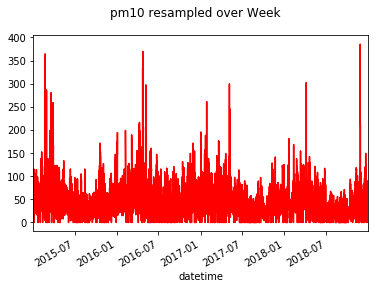

<Figure size 1440x720 with 0 Axes>

In [47]:
from matplotlib import pyplot as plt
r2 = df.pm10
r2.plot(subplots = True, title='pm10 resampled over Week', color='red')
plt.figure(figsize=(20,10))
plt.show()
plt.close()

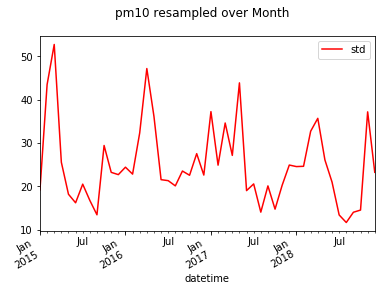

<Figure size 1200x800 with 0 Axes>

In [10]:
from matplotlib import pyplot as plt
r2 = df.pm10.resample('M').agg(['std'])
r2.plot(subplots = True, title='pm10 resampled over Month', color='red')
plt.figure(dpi=200)
plt.show()
plt.close()

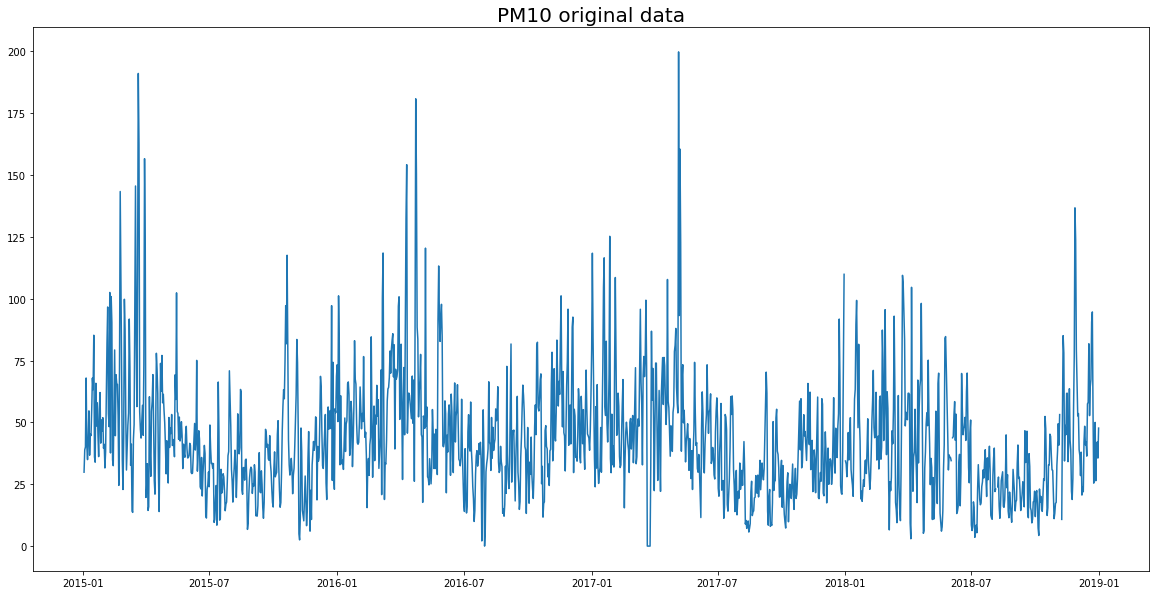

In [46]:
plt.figure(figsize=[20, 10])
plt.plot(df.pm10.resample('D').agg('mean'))
plt.title('PM10 original data', fontsize=20)
plt.show()
plt.close('all')

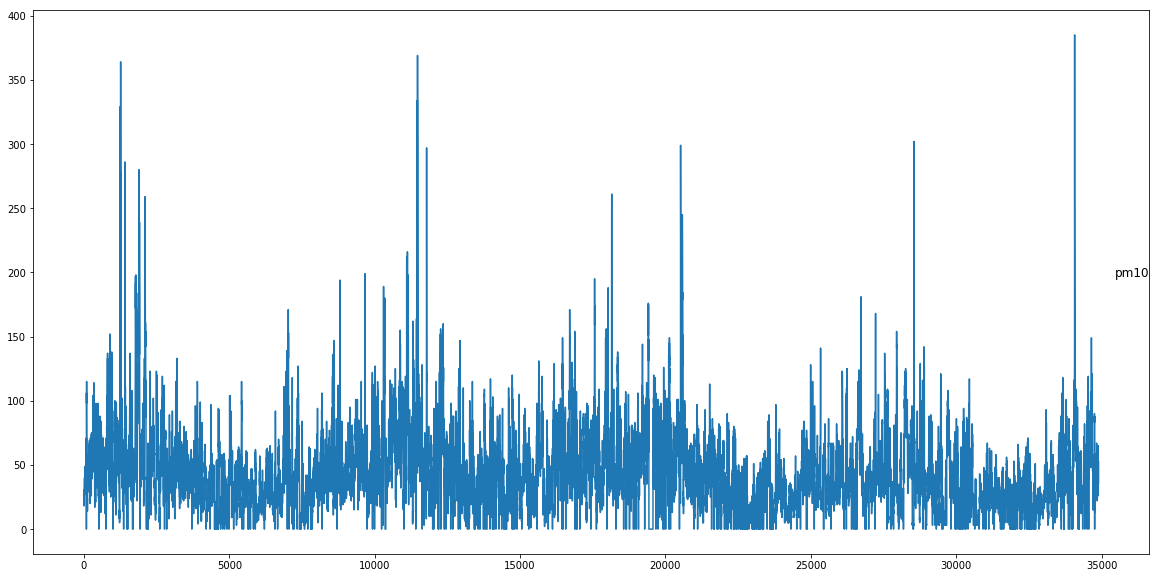

In [34]:
#plot each data statu

from matplotlib import pyplot as plt
# load dataset
#df = read_csv('seoul.csv', header=0, index_col=0)
values = df.values
#df.index.name = 'datetime'

# specify columns to plot
groups = [0]
i = 1
# plot each column
plt.figure(figsize=[20,10])
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
plt.close()

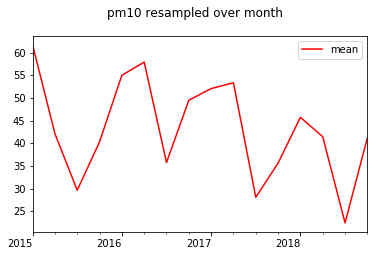

<Figure size 4000x2000 with 0 Axes>

In [69]:
r2 = df.pm10.resample('Q').agg(['mean'])
r2.plot(subplots = True, title='pm10 resampled over month', color='red')
plt.xticks(rotation=0)
plt.xlabel('')
plt.figure(figsize=[20,10], dpi=200)
plt.show()
plt.close()

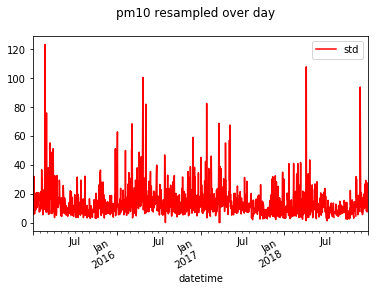

<Figure size 1800x1200 with 0 Axes>

In [12]:
r2 = df.pm10.resample('D').agg(['std'])
r2.plot(subplots = True, title='pm10 resampled over day', color='red')
plt.figure(dpi=300)
plt.show()
plt.close()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


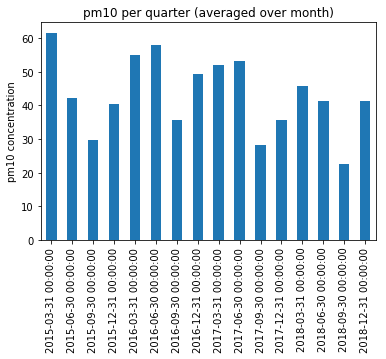

In [72]:
# Sum of pm10 resampled over month
df['pm10'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('pm10 concentration')
plt.xlabel('')
plt.axes()
plt.title('pm10 per quarter (averaged over month)')
plt.show()
plt.close()

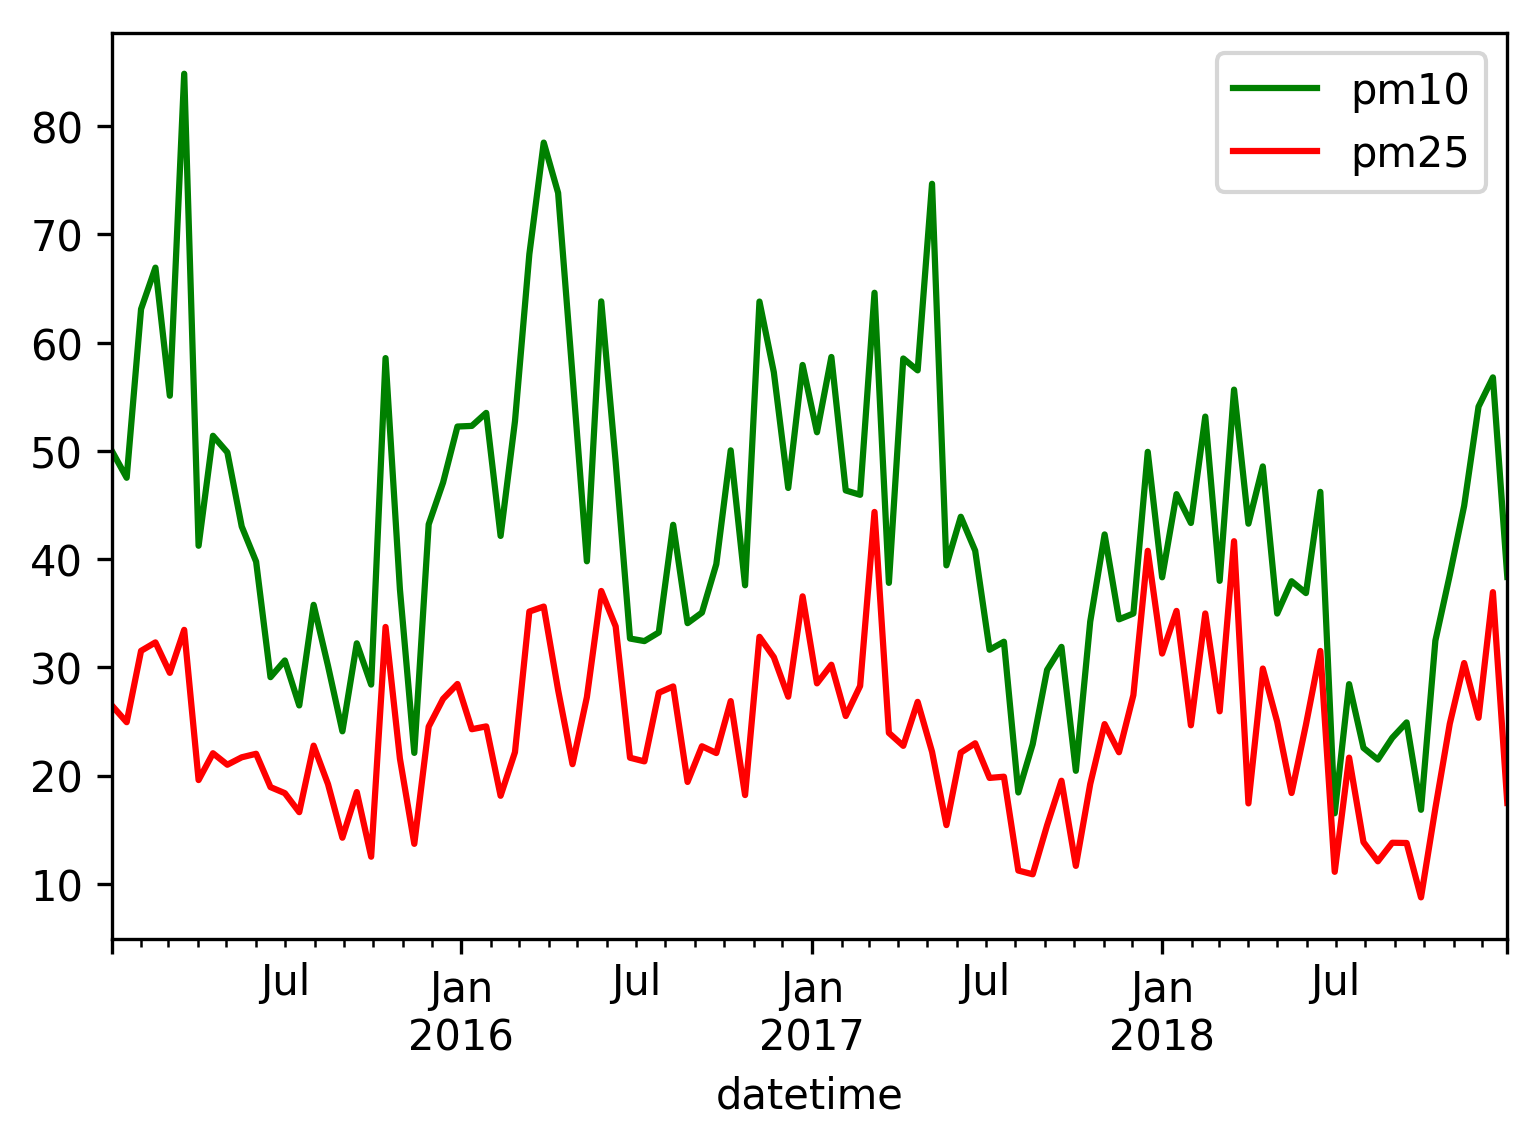

In [14]:
## resampling over week and computing mean
plt.figure(dpi=300)
df.pm10.resample('15D').mean().plot(color='g', legend=True)
df.pm25.resample('15D').mean().plot(color='r', legend=True)

#df.temperature.resample('W').mean().plot(color='orange',legend=True)
#df.humidity.resample('W').mean().plot(color='pink', legend=True)

#df.rain.resample('W').std().plot(color='g',legend=True)

#df.wind_direction.resample('W').mean().plot(color='black', legend=True)
#df.sky_condition.resample('W').mean().plot(color='lightblue', legend=True)
#df.rain_condition.resample('W').mean().plot(color='cyan', legend=True)
#df.wind_speed.resample('W').mean().plot(color='b', legend=True)

plt.show()
plt.close()

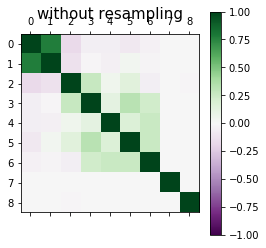

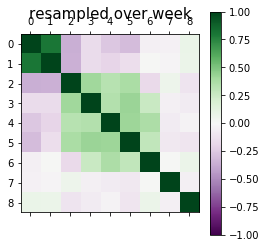

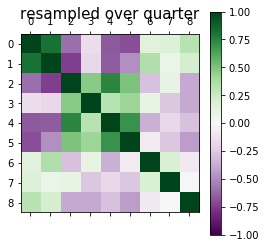

In [15]:
# Correlations among columns
plt.matshow(df.corr(method='pearson'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

# Correlations of mean of features resampled over months
plt.matshow(df.resample('W').mean().corr(method='pearson'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over week', size=15)
plt.colorbar()

plt.margins(0.02)
plt.matshow(df.resample('Q').mean().corr(method='pearson'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over quarter', size=15)
plt.colorbar()
plt.show()
plt.close()

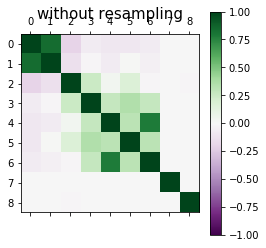

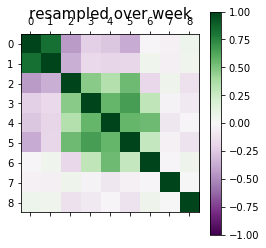

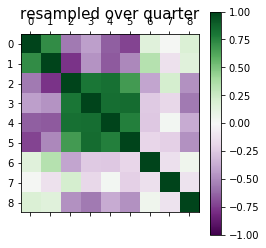

In [16]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

# Correlations of mean of features resampled over months
plt.matshow(df.resample('W').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over week', size=15)
plt.colorbar()

plt.margins(0.02)
plt.matshow(df.resample('Q').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over quarter', size=15)
plt.colorbar()
plt.show()
plt.close()

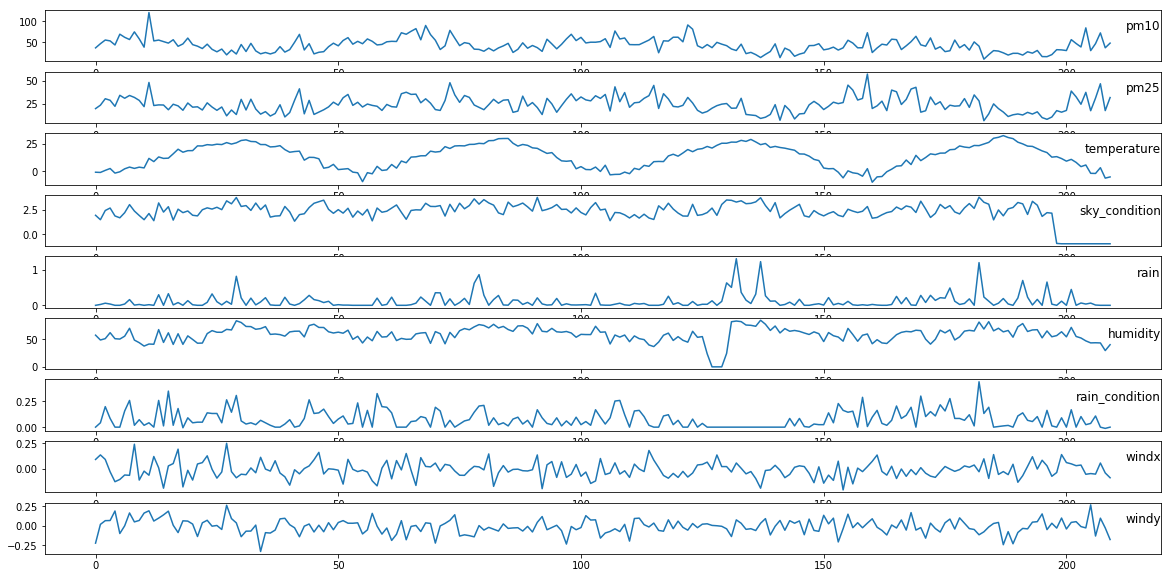

In [91]:
#plot each data statu

from matplotlib import pyplot as plt
# load dataset
#df = read_csv('seoul.csv', header=0, index_col=0)
df2=df.resample('W').mean()    
values = df2.values
#df.index.name = 'datetime'

# specify columns to plot
groups = [0,1,2,3,4,5,6,7,8]
i = 1
# plot each column
plt.figure(figsize=[20,10])
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
plt.close()